In [44]:
import pandas as pd

df = pd.read_csv('/content/tcc_ceds_music.csv')

df.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pÃ©rez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


# 1. Data Exploration and Understanding (5%):
• Thorough exploration of the dataset.
• Clear understanding of data characteristics.

In [45]:
# Initial exploration has been done above, providing an overview of the dataset's structure and basic statistics.

# Further data exploration focusing on:
# 1. Distribution of genres
genre_distribution = df['genre'].value_counts()

# 2. Overview of release years
release_years_distribution = df['release_date'].value_counts().sort_index()

# 3. Check for missing values
missing_values = df.isnull().sum()

# 4. Overview of numeric features distribution
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features_distribution = numeric_features.describe()

#genre_distribution, release_years_distribution, missing_values, numeric_features_distribution.head()


# 2. Data Preprocessing

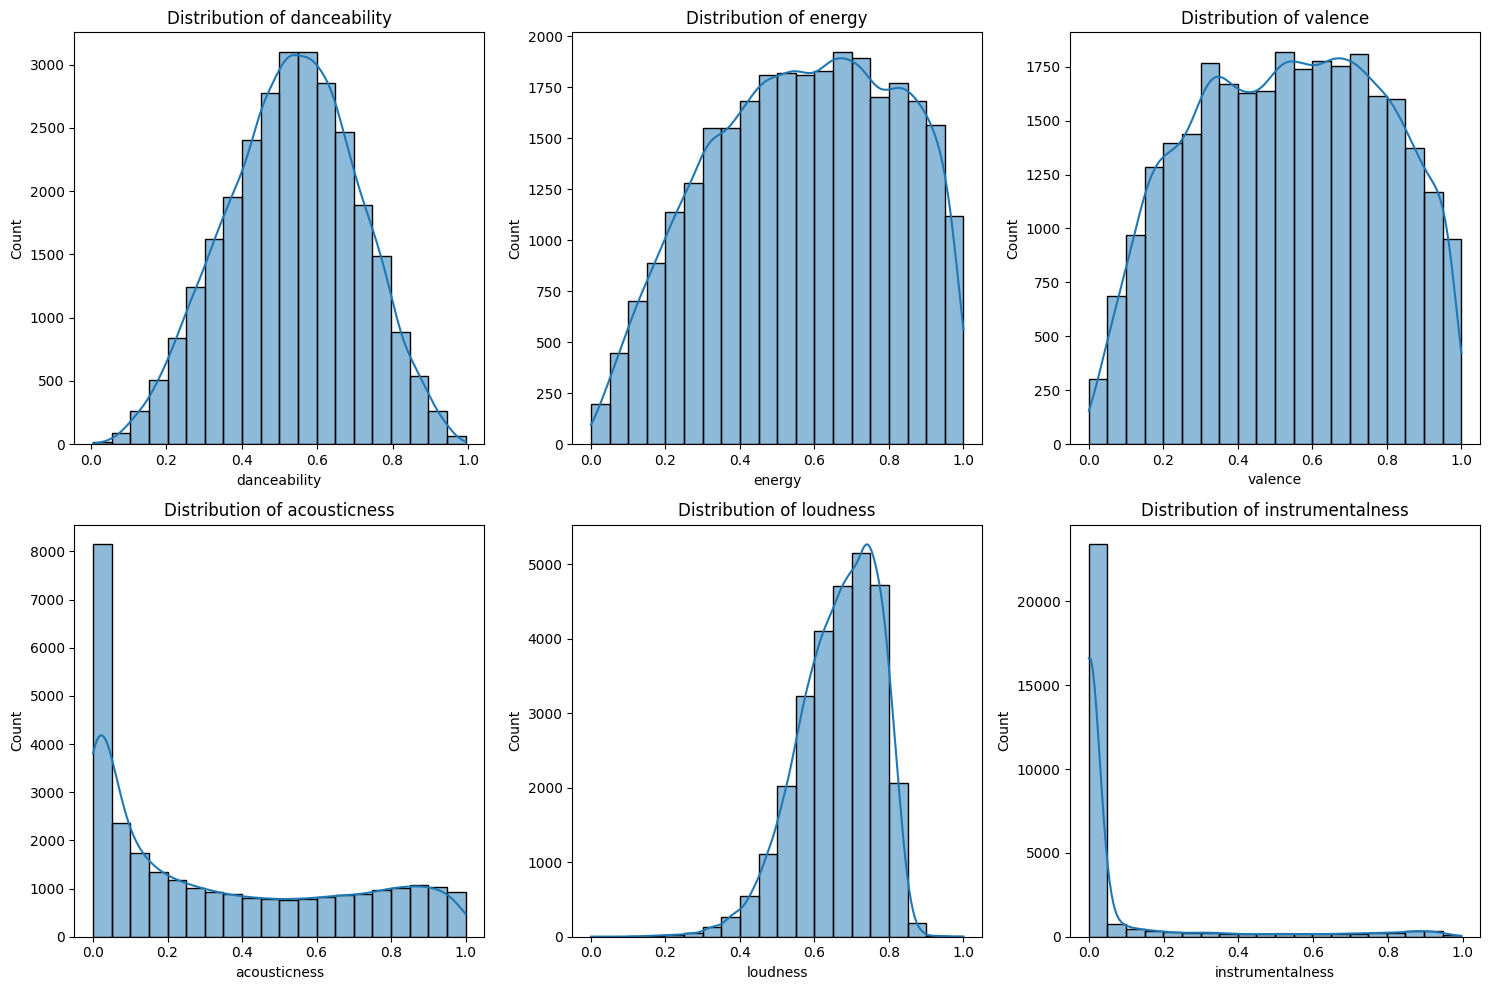

Unnamed: 0                     0
release_date                   0
len                         1234
dating                      6508
violence                    1499
world/life                  1265
night/time                  3188
shake the audience          5511
family/gospel               6541
romantic                    3955
communication               1122
obscene                     5371
music                       3969
movement/places             4120
light/visual perceptions    3192
family/spiritual            3740
like/girls                  4568
sadness                      658
feelings                    3141
danceability                  11
loudness                     274
acousticness                   0
instrumentalness            5929
valence                        0
energy                         0
age                            0
Extraversion                   0
Agreeableness                  0
Conscientiousness              0
Neuroticism                    0
Openness  

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is the original DataFrame loaded with the dataset
# Set cutoff year for filtering the dataset based on release year
cutoff_year = 1949
df_filtered = df[df['release_date'] > cutoff_year]

# Add generation categorization
generation_boundaries = {
    'Baby Boomer': (1946, 1964),
    'Generation X': (1965, 1979),
    'Millennials': (1980, 1994),
    'Generation Z': (1995, 2012),
    'Gen Alpha': (2013, 2025)
}

def categorize_by_generation(release_date):
    for gen, (start_year, end_year) in generation_boundaries.items():
        if start_year <= release_date <= end_year:
            return gen
    return 'Unknown'

df_filtered['generation'] = df_filtered['release_date'].apply(categorize_by_generation)

# Create columns for each personality type
personality_types = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
for personality in personality_types:
    # Placeholder for metric or flag; adjust as necessary for your specific needs
    df_filtered[personality] = 0  # Initialize with zero or any other default value

# Checking for outliers in numerical features within the filtered dataset
numeric_features_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_features_filtered.quantile(0.25)
Q3 = numeric_features_filtered.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers as those beyond 1.5 times the IQR from the Q1 and Q3 in the filtered dataset
outliers_filtered = ((numeric_features_filtered < (Q1 - 1.5 * IQR)) | (numeric_features_filtered > (Q3 + 1.5 * IQR))).sum()

# For exploratory data analysis (EDA), focusing on the distribution of numeric features in the filtered dataset
# Selecting a subset of interesting numeric features for visualization
features_to_plot = ['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'instrumentalness']
df_subset_filtered = df_filtered[features_to_plot]

# Plotting histograms for selected features in the filtered dataset
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_subset_filtered[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Displaying outliers in the filtered dataset
print(outliers_filtered)


#df_filtered.to_excel('ensuringcolumns.xlsx')

# Clustering: Genre and Features

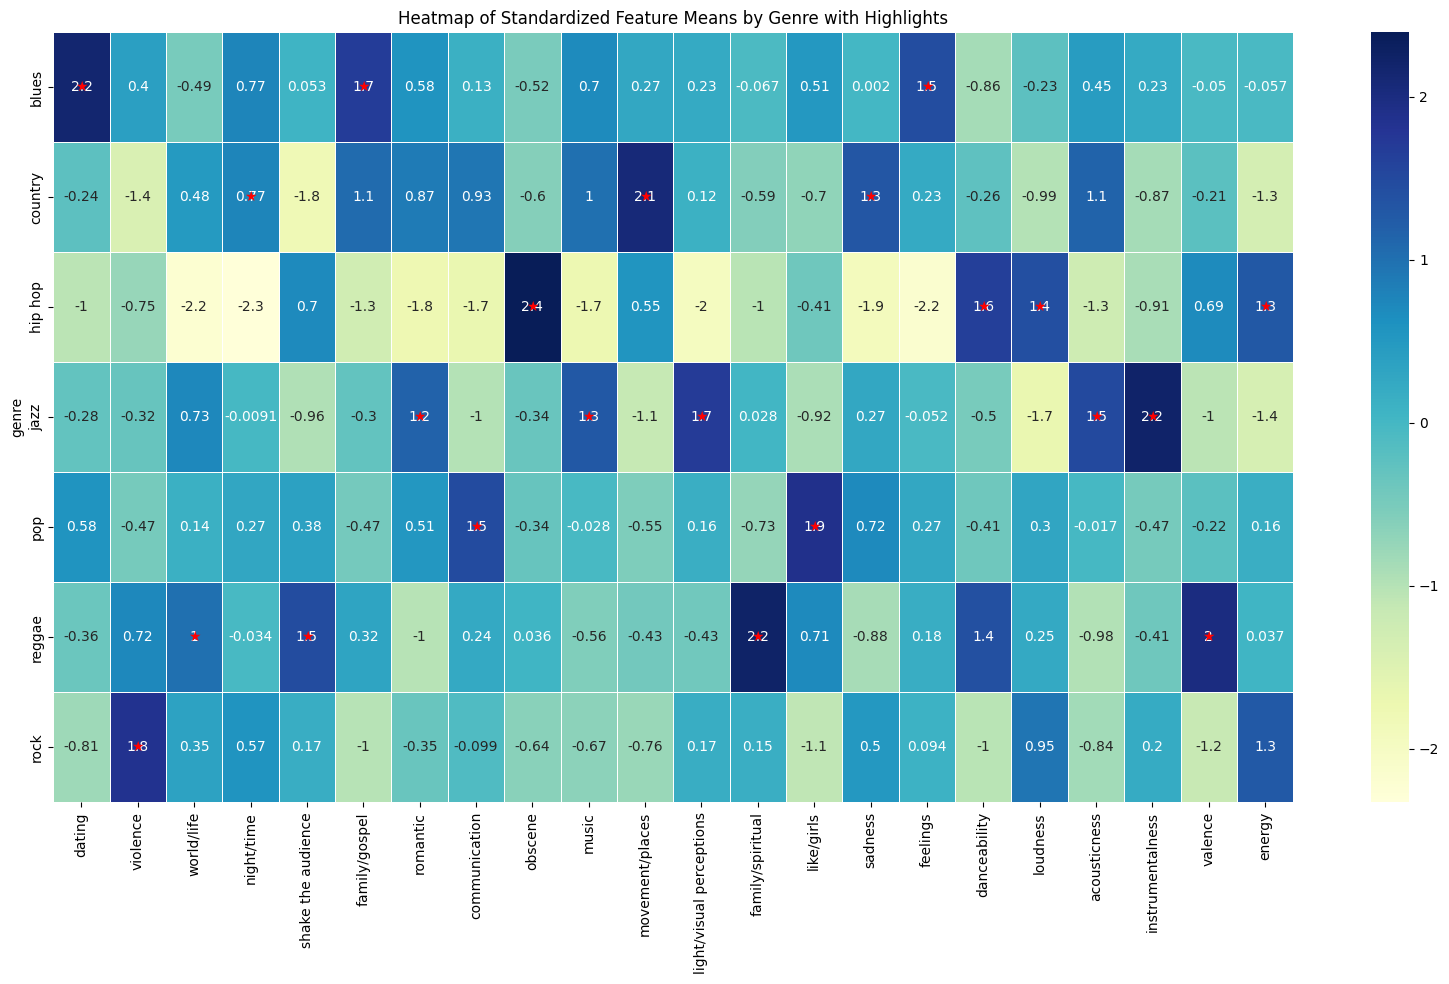

In [47]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting Relevant Features for Clustering
features_for_clustering = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls',
    'sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
    'instrumentalness', 'valence', 'energy'
]

# Calculating the mean of each feature within each genre
genre_feature_means = df_filtered.groupby('genre')[features_for_clustering].mean()

# Standardizing the Data for better visualization
scaler = StandardScaler()
genre_feature_means_scaled = scaler.fit_transform(genre_feature_means)
genre_feature_means_scaled_df = pd.DataFrame(genre_feature_means_scaled, columns=features_for_clustering, index=genre_feature_means.index)

# Finding the genre with the highest mean value for each feature
max_feature_values = genre_feature_means_scaled_df.idxmax()

# Highlighting these max values in the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed to fit all features
sns.heatmap(genre_feature_means_scaled_df, cmap="YlGnBu", annot=True, linewidths=.5)

# Add markers for the highest value in each column
for feature, genre in max_feature_values.items():
    # Getting the indices for plotting
    genre_idx = list(genre_feature_means_scaled_df.index).index(genre)
    feature_idx = list(genre_feature_means_scaled_df.columns).index(feature)
    # Plot the marker
    plt.text(feature_idx + 0.5, genre_idx + 0.5, '★', ha='center', va='center', color='red')

# Adjust the x-ticks to fit all feature names
plt.xticks(rotation=90)  # Rotate the labels to make them readable
plt.title('Heatmap of Standardized Feature Means by Genre with Highlights')
plt.show()


- sending to excel file
- Uploading excel file with predictions to power BI to start making the dashboard

In [48]:
import pandas as pd

# Assuming 'genre_feature_means_scaled_df' is your DataFrame from previous steps

# Mapping of personalities to their preferred genres and features

'''
You can now change the features below, you can edit the rank of them. So if you change the order of the features, it readjusts in hte output
'''

personality_genre_map = {
    'Extraversion': {
        'genres': ['hip hop', 'pop'],
        'features': ['danceability', 'energy', 'dating','night/time']
    },
    'Agreeableness': {
        'genres': ['country', 'pop', 'reggae'],
        'features': ['valence', 'dating','family/gospel','like/girls']
    },
    'Conscientiousness': {
        'genres': ['country','rock'],
        'features': ['instrumentalness', 'family/gospel','movement/places','feelings']
    },
    'Neuroticism': {
        'genres': ['jazz', 'rock'],
        'features': ['valence', 'sadness', 'romantic','loudness']  # Considering low loudness, but we need to handle this inversely
    },
    'Openness': {
        'genres': ['blues', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'],
        'features': ['acousticness','romantic','communication','energy']
    }
}

def suggest_genre(user_personality):
    # Initialize a dictionary to hold scores for each genre
    genre_scores = {genre: 0 for genre in personality_genre_map[user_personality]['genres']}

    if user_personality in personality_genre_map:
        preferred_genres = personality_genre_map[user_personality]['genres']
        preferred_features = personality_genre_map[user_personality]['features']  # Get preferred features
        feature_priority = {feature: index for index, feature in enumerate(preferred_features)}  # Assign priority based on order

        for genre in preferred_genres:
            if genre in genre_feature_means_scaled_df.index:  # Check if the genre is present in the data
                for feature in preferred_features:
                    # Update scores for the specified genre based on the preferred features
                    if user_personality == 'Neuroticism' and feature == 'loudness':
                        genre_scores[genre] -= abs(genre_feature_means_scaled_df.loc[genre, feature])  # Inverse handling
                    else:
                        genre_scores[genre] += genre_feature_means_scaled_df.loc[genre, feature] * (len(preferred_features) - feature_priority[feature])  # Weighted scoring

        # Calculate total score
        total_score = sum(genre_scores.values())

        # Normalize prediction percentages to a 100 percent scale
        prediction_percentage = {genre: (score / total_score) * 100 for genre, score in genre_scores.items()}

        return prediction_percentage
    else:
        print(f"Invalid personality type '{user_personality}'. Please provide a valid personality type.")
        return {}


def suggest_songs_based_on_personality(df, user_personality, personality_genre_map, prediction_percentage, top_n=100):
    """
    Suggest songs based on the genres and features relevant to the user's personality type,
    considering the prediction percentages for genre relevance.

    :param df: DataFrame containing the songs data.
    :param user_personality: The user's personality type.
    :param personality_genre_map: Mapping of personality types to their preferred genres and features.
    :param prediction_percentage: Prediction percentages for genres from suggest_genre function.
    :param top_n: Number of top songs to return.
    :return: A DataFrame containing the top N suggested songs.
    """
    if user_personality not in personality_genre_map or not prediction_percentage:
        print(f"Invalid personality type '{user_personality}' or no genre predictions available.")
        return pd.DataFrame()  # Return an empty DataFrame for invalid personality types or missing predictions

    # Extract relevant genres based on prediction percentages (assuming higher percentages mean more relevance)
    relevant_genres = [genre for genre in prediction_percentage]

    # Filter songs by selected genres
    df_filtered = df[df['genre'].str.lower().isin([g.lower() for g in relevant_genres])]

    features = personality_genre_map[user_personality]['features']
    # Normalize the features within the filtered DataFrame and calculate a composite score
    for feature in features:
        df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())

    norm_features = [f + '_norm' for f in features]
    df_filtered['composite_score'] = df_filtered[norm_features].mean(axis=1)

    # Sort by the composite score in descending order to get the top songs
    top_songs = df_filtered.sort_values(by='composite_score', ascending=False).head(top_n)

    return top_songs[['artist_name', 'track_name', 'genre'] + features + ['composite_score']]


##########################################

#Edit the personality here
user_personality = 'Neuroticism'  # User input for personality type

##########################################

# Now, 'suggest_genre' only considers the genres associated with the given personality type
prediction_percentage = suggest_genre(user_personality)

if prediction_percentage:
    print(f"Prediction percentages for genres associated with {user_personality}:")
    for genre, percentage in prediction_percentage.items():
        print(f"{genre}: {percentage:.2f}%")
else:
    print(f"No genres associated with {user_personality} in the dictionary map.")

# Example usage
prediction_percentage = suggest_genre(user_personality)  # Ensure this function returns a dictionary of genre: percentage

if prediction_percentage:
    suggested_songs = suggest_songs_based_on_personality(df_filtered, user_personality, personality_genre_map, prediction_percentage, 100)

    if not suggested_songs.empty:
        # Add a new column with the genre percentages
        suggested_songs['Percentage Recommendation'] = suggested_songs['genre'].map(prediction_percentage)

        # Output to Excel file
        output_file = f"suggested_songs_{user_personality}_{cutoff_year}.xlsx"
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            suggested_songs.to_excel(writer, sheet_name=user_personality, index=False)
        print(f"Suggested songs have been saved to '{output_file}' with percentage recommendation.")
    else:
        print("No song suggestions available based on the selected personality.")
else:
    print(f"No genres associated with {user_personality} in the dictionary map.")




Prediction percentages for genres associated with Neuroticism:
jazz: 36.61%
rock: 63.39%
Suggested songs have been saved to 'suggested_songs_Neuroticism_1949.xlsx' with percentage recommendation.


<ipython-input-48-7970e134b2c5>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())
<ipython-input-48-7970e134b2c5>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[feature + '_norm'] = (df_filtered[feature] - df_filtered[feature].min()) / (df_filtered[feature].max() - df_filtered[feature].min())
<ipython-input-48-7970e134b2c5>:89: SettingWithCopyWarning

# Now, 'suggest_genre' only considers the genres associated with the given personality type
prediction_percentage = suggest_genre(user_personality)

if prediction_percentage:
    print(f"Prediction percentages for genres associated with {user_personality}:")
    for genre, percentage in prediction_percentage.items():
        print(f"{genre}: {percentage:.2f}%")
else:
    print(f"No genres found for personality type '{user_personality}'")

## Suggesting songs based on the above personality to genre analysis

In [49]:
import pandas as pd

def calculate_composite_scores(df_filtered, genre_feature_means_scaled_df, personality_genre_map):
    """
    Calculate composite scores for each song in the DataFrame based on the standardized genre feature means
    and the personality genre and feature preferences. Features not relevant to the personality are set to zero.

    :param df_filtered: DataFrame containing songs data with genres and generation listed.
    :param genre_feature_means_scaled_df: DataFrame with standardized genre feature means.
    :param personality_genre_map: Dictionary mapping of personality types to their features and genres.
    :return: DataFrame updated with new composite score columns for each personality.
    """
    # Ensure the 'genre' column in df_filtered is formatted the same way as the index in genre_feature_means_scaled_df
    df_filtered['genre'] = df_filtered['genre'].str.lower()

    # Add a composite score column for each personality type
    for personality, preferences in personality_genre_map.items():
        df_filtered[personality + '_composite_score'] = 0.0

        # Get relevant features and genres for the current personality
        relevant_features = preferences['features']
        relevant_genres = [genre.lower() for genre in preferences['genres']]  # Ensure genre matching case-insensitivity

        # Calculate the composite score for relevant genres and features
        for index, row in df_filtered.iterrows():
            if row['genre'] in relevant_genres:
                score_sum = 0
                count = 0
                for feature in relevant_features:
                    if feature in genre_feature_means_scaled_df.columns and row['genre'] in genre_feature_means_scaled_df.index:
                        # Use the scaled feature mean for this genre
                        score_sum += genre_feature_means_scaled_df.at[row['genre'], feature]
                        count += 1
                # Average the scores from the relevant features if any features were valid
                if count > 0:
                    df_filtered.at[index, personality + '_composite_score'] = score_sum / count

    return df_filtered

# Use df_filtered prepared with all previous processing steps including generation categorization
df_updated = calculate_composite_scores(df_filtered, genre_feature_means_scaled_df, personality_genre_map)

# Display the first few rows to check
print(df_updated.head(5))

# Optionally, save to an Excel file
output_file = 'songs_with_personality_scores.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df_updated.to_excel(writer, index=False)
print(f"Updated songs data with personality composite scores has been saved to '{output_file}'.")


   Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10          pÃ©rez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...  Extrav